In [1]:
import pandas as pd
import seaborn as sns
sns.set()
import missingno as msnum

In [2]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_row", 160)
pd.set_option('max_colwidth', 200)

In [3]:
rejected = pd.read_csv('../../Data/rejected.csv')

In [4]:
rejected.isnull().sum()

Amount Requested               0
Application Date               0
Loan Title                  1303
Risk_Score              18497630
Debt-To-Income Ratio           0
Zip Code                     293
State                         22
Employment Length         951355
Policy Code                  918
dtype: int64

In [5]:
#msnum.bar(rejected);

In [6]:
#rejected['Policy Code'].value_counts()

In [7]:
#rejected['Application Date'].value_counts()

In [8]:
rejected.head(2)

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0


In [9]:
# 1. Date should not have impact on application outcome? Not 100% sure, but fair assumption. (Drop)
# 2. Policy Code is determined after review of application. Not a pre-known feature. (Drop)
# 3. Zip Code & State (Geographic Factors) also don't play a role in application outcome. (Drop x 2)
# 4. Application Amount vs Debt To Income.....DTI is more important, but isn't there a 40k ceiling? 
# 5. Risk Score is Crucial. DTI, Amount Requested, Employment Length, Loan Title. (Keep 5, Drop 4)??

In [9]:
drop = rejected[['Application Date', 'Zip Code', 'State', 'Policy Code', 'Amount Requested']]
drop

,Application Date,Zip Code,State,Policy Code,Amount Requested
0,2007-05-26,481xx,NM,0.0,1000.0
1,2007-05-26,010xx,MA,0.0,1000.0
2,2007-05-27,212xx,MD,0.0,11000.0
3,2007-05-27,017xx,MA,0.0,6000.0
4,2007-05-27,209xx,MD,0.0,1500.0
...,...,...,...,...,...
27648736,2016-12-31,441xx,OH,0.0,10000.0
27648737,2016-12-31,207xx,MD,0.0,10000.0
27648738,2016-12-31,914xx,CA,0.0,1200.0
27648739,2016-12-31,880xx,NM,0.0,25000.0


In [10]:
keep = rejected[['Loan Title', 'Risk_Score', 'Debt-To-Income Ratio', 'Employment Length']]
keep

,Loan Title,Risk_Score,Debt-To-Income Ratio,Employment Length
0,Wedding Covered but No Honeymoon,693.0,10%,4 years
1,Consolidating Debt,703.0,10%,< 1 year
2,Want to consolidate my debt,715.0,10%,1 year
3,waksman,698.0,38.64%,< 1 year
4,mdrigo,509.0,9.43%,< 1 year
...,...,...,...,...
27648736,Debt consolidation,590.0,41.26%,< 1 year
27648737,moving,NaN,1.48%,5 years
27648738,Other,686.0,10.26%,< 1 year
27648739,debt_consolidation,NaN,17.71%,< 1 year


In [11]:
keep.isnull().sum()

Loan Title                  1303
Risk_Score              18497630
Debt-To-Income Ratio           0
Employment Length         951355
dtype: int64

In [12]:
r = keep.dropna().reset_index(drop=True)

In [13]:
r

,Loan Title,Risk_Score,Debt-To-Income Ratio,Employment Length
0,Wedding Covered but No Honeymoon,693.0,10%,4 years
1,Consolidating Debt,703.0,10%,< 1 year
2,Want to consolidate my debt,715.0,10%,1 year
3,waksman,698.0,38.64%,< 1 year
4,mdrigo,509.0,9.43%,< 1 year
...,...,...,...,...
8992580,Debt consolidation,681.0,55.15%,< 1 year
8992581,Debt consolidation,531.0,31.31%,< 1 year
8992582,Debt consolidation,590.0,41.26%,< 1 year
8992583,Other,686.0,10.26%,< 1 year


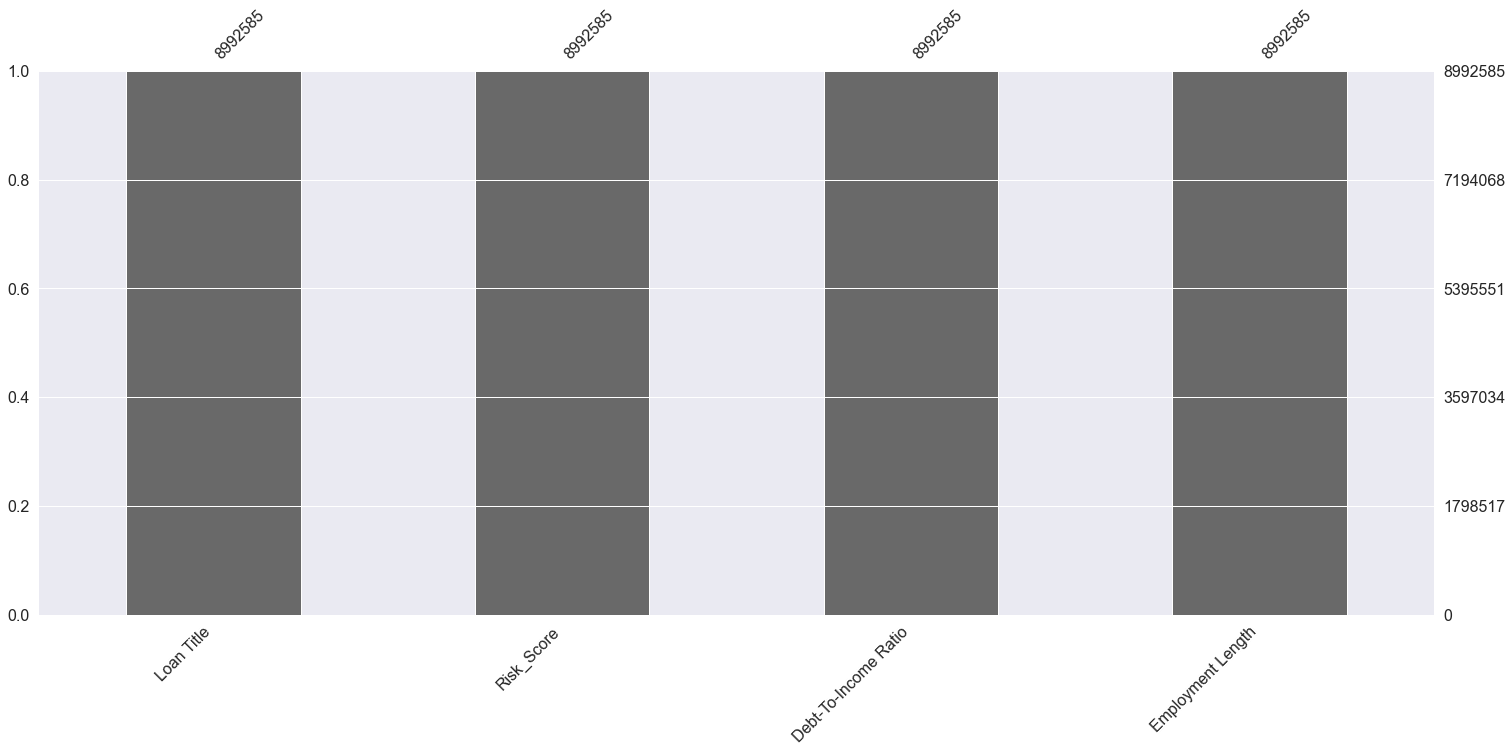

In [14]:
msnum.bar(r);

In [15]:
r.dtypes

Loan Title               object
Risk_Score              float64
Debt-To-Income Ratio     object
Employment Length        object
dtype: object

In [16]:
#r['Policy Code'].value_counts()

In [17]:
pd.read_excel('../../Data/LCDataDictionary.xlsx')

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


In [18]:
r = r.rename(columns={"Debt-To-Income Ratio":"DI"})

In [19]:
r

,Loan Title,Risk_Score,DI,Employment Length
0,Wedding Covered but No Honeymoon,693.0,10%,4 years
1,Consolidating Debt,703.0,10%,< 1 year
2,Want to consolidate my debt,715.0,10%,1 year
3,waksman,698.0,38.64%,< 1 year
4,mdrigo,509.0,9.43%,< 1 year
...,...,...,...,...
8992580,Debt consolidation,681.0,55.15%,< 1 year
8992581,Debt consolidation,531.0,31.31%,< 1 year
8992582,Debt consolidation,590.0,41.26%,< 1 year
8992583,Other,686.0,10.26%,< 1 year


In [20]:
r['DI'] = r['DI'].str.rstrip("%").astype(float)/100

In [21]:
r

,Loan Title,Risk_Score,DI,Employment Length
0,Wedding Covered but No Honeymoon,693.0,0.1000,4 years
1,Consolidating Debt,703.0,0.1000,< 1 year
2,Want to consolidate my debt,715.0,0.1000,1 year
3,waksman,698.0,0.3864,< 1 year
4,mdrigo,509.0,0.0943,< 1 year
...,...,...,...,...
8992580,Debt consolidation,681.0,0.5515,< 1 year
8992581,Debt consolidation,531.0,0.3131,< 1 year
8992582,Debt consolidation,590.0,0.4126,< 1 year
8992583,Other,686.0,0.1026,< 1 year


In [22]:
r = r.assign(Accepted = 0)
r

,Loan Title,Risk_Score,DI,Employment Length,Accepted
0,Wedding Covered but No Honeymoon,693.0,0.1000,4 years,0
1,Consolidating Debt,703.0,0.1000,< 1 year,0
2,Want to consolidate my debt,715.0,0.1000,1 year,0
3,waksman,698.0,0.3864,< 1 year,0
4,mdrigo,509.0,0.0943,< 1 year,0
...,...,...,...,...,...
8992580,Debt consolidation,681.0,0.5515,< 1 year,0
8992581,Debt consolidation,531.0,0.3131,< 1 year,0
8992582,Debt consolidation,590.0,0.4126,< 1 year,0
8992583,Other,686.0,0.1026,< 1 year,0


In [23]:
r.dtypes

Loan Title            object
Risk_Score           float64
DI                   float64
Employment Length     object
Accepted               int64
dtype: object

In [24]:
r.describe()

,Risk_Score,DI,Accepted
count,8.992585e+06,8.992585e+06,8992585.0
mean,6.273527e+02,1.695683e+00,0.0
std,8.993240e+01,1.776785e+02,0.0
min,0.000000e+00,-1.000000e-02,0.0
25%,5.910000e+02,9.060000e-02,0.0
50%,6.360000e+02,2.055000e-01,0.0
75%,6.740000e+02,3.626000e-01,0.0
max,9.900000e+02,5.000003e+05,0.0


In [25]:
accepted = pd.read_csv('../../Data/accepted.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [26]:
accepted

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68407277,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.00,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68355089,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.00,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,793

In [27]:
a = accepted[['loan_amnt', 'funded_amnt', 'purpose', 'fico_range_low', 
          'fico_range_high', 'annual_inc', 'emp_length']]

In [28]:
a.shape

(2260701, 7)

In [29]:
a.isnull().sum()

loan_amnt              33
funded_amnt            33
purpose                33
fico_range_low         33
fico_range_high        33
annual_inc             37
emp_length         146940
dtype: int64

In [33]:
a[a['loan_amnt']!=a['funded_amnt']]

,loan_amnt,funded_amnt,purpose,fico_range_low,fico_range_high,annual_inc,emp_length
421095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
528961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
528962,NaN,NaN,NaN,NaN,NaN,NaN,NaN
651664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2038502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2157151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2157152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2260699,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
a[a.annual_inc == 0] 

,loan_amnt,funded_amnt,purpose,fico_range_low,fico_range_high,annual_inc,emp_length
18202,20000.0,20000.0,debt_consolidation,685.0,689.0,0.0,NaN
65620,3700.0,3700.0,credit_card,680.0,684.0,0.0,NaN
421705,40000.0,40000.0,home_improvement,695.0,699.0,0.0,NaN
422321,40000.0,40000.0,debt_consolidation,755.0,759.0,0.0,NaN
422379,3000.0,3000.0,other,790.0,794.0,0.0,2 years
...,...,...,...,...,...,...,...
2228436,8750.0,8750.0,debt_consolidation,715.0,719.0,0.0,NaN
2228456,18000.0,18000.0,debt_consolidation,680.0,684.0,0.0,< 1 year
2230378,10000.0,10000.0,credit_card,705.0,709.0,0.0,NaN
2232830,23950.0,23950.0,debt_consolidation,670.0,674.0,0.0,NaN


In [35]:
a = a.drop(a[a.annual_inc == 0].index)

In [36]:
a = a.assign(FICO = (a['fico_range_low'] + a['fico_range_high'])/2)

In [37]:
a = a.assign(Accepted = 1)

In [38]:
a.shape

(2259034, 9)

In [39]:
a = a.rename(columns={"FICO":"Risk_Score"})

In [40]:
a = a.rename(columns={'purpose':"Loan Title"})

In [41]:
a = a.rename(columns={'loan_amnt':'Amount Requested'})

In [42]:
a = a.rename(columns={'issue_d':'Application Date'})

In [43]:
a = a.assign(DI = (a['Amount Requested'] / a['annual_inc']))

In [44]:
a = a[['Amount Requested','Loan Title','Risk_Score', 'DI', 'emp_length', 'Accepted']]

In [45]:
a = a.rename(columns={"emp_length":"Employment Length"})

In [46]:
a

,Amount Requested,Loan Title,Risk_Score,DI,Employment Length,Accepted
0,3600.0,debt_consolidation,677.0,0.065455,10+ years,1
1,24700.0,small_business,717.0,0.380000,10+ years,1
2,20000.0,home_improvement,697.0,0.317460,10+ years,1
3,35000.0,debt_consolidation,787.0,0.318182,10+ years,1
4,10400.0,major_purchase,697.0,0.099585,3 years,1
...,...,...,...,...,...,...
2260696,40000.0,debt_consolidation,707.0,0.176211,9 years,1
2260697,24000.0,debt_consolidation,662.0,0.218182,6 years,1
2260698,14000.0,debt_consolidation,662.0,0.147368,10+ years,1
2260699,NaN,NaN,NaN,NaN,NaN,1


In [47]:
a.isna().sum()

Amount Requested         33
Loan Title               33
Risk_Score               33
DI                       37
Employment Length    145373
Accepted                  0
dtype: int64

In [48]:
#a['Employment Length'] = a['Employment Length'].replace(np.nan, 'None')

In [49]:
#a

In [50]:
a.shape

(2259034, 6)

In [51]:
a.isna().sum()

Amount Requested         33
Loan Title               33
Risk_Score               33
DI                       37
Employment Length    145373
Accepted                  0
dtype: int64

In [52]:
a = a.dropna()

In [53]:
a.isna().sum()

Amount Requested     0
Loan Title           0
Risk_Score           0
DI                   0
Employment Length    0
Accepted             0
dtype: int64

In [54]:
a.describe()

,Amount Requested,Risk_Score,DI,Accepted
count,2.113657e+06,2.113657e+06,2.113657e+06,2113657.0
mean,1.525026e+04,7.004050e+02,3.339840e-01,1.0
std,9.221131e+03,3.272035e+01,5.329401e+01,0.0
min,5.000000e+02,6.120000e+02,1.612903e-04,1.0
25%,8.000000e+03,6.770000e+02,1.243902e-01,1.0
50%,1.310000e+04,6.920000e+02,2.000000e-01,1.0
75%,2.000000e+04,7.170000e+02,2.926829e-01,1.0
max,4.000000e+04,8.475000e+02,4.000000e+04,1.0


In [55]:
a.shape

(2113657, 6)

In [56]:
#a['Application Date'].value_counts()

In [65]:
a[a['DI']>1]

,Amount Requested,Loan Title,Risk_Score,DI,Employment Length,Accepted
4526,25000.0,debt_consolidation,682.0,1.262626,2 years,1
13700,28000.0,debt_consolidation,677.0,1.647059,9 years,1
16964,18200.0,debt_consolidation,702.0,1.516667,< 1 year,1
50299,24000.0,debt_consolidation,687.0,1.200000,5 years,1
66461,19000.0,other,677.0,3.800000,1 year,1
...,...,...,...,...,...,...
2256001,29900.0,credit_card,692.0,1.121645,9 years,1
2256480,18000.0,debt_consolidation,702.0,2.250000,< 1 year,1
2257822,20000.0,debt_consolidation,662.0,1.111111,< 1 year,1
2258090,35000.0,credit_card,672.0,7.000000,1 year,1


In [57]:
r.head(2)

,Loan Title,Risk_Score,DI,Employment Length,Accepted
0,Wedding Covered but No Honeymoon,693.0,0.1,4 years,0
1,Consolidating Debt,703.0,0.1,< 1 year,0


In [58]:
a.head(2)

,Amount Requested,Loan Title,Risk_Score,DI,Employment Length,Accepted
0,3600.0,debt_consolidation,677.0,0.065455,10+ years,1
1,24700.0,small_business,717.0,0.380000,10+ years,1


In [59]:
combo = pd.concat([a,r]).reset_index(drop=True)
combo

,Amount Requested,Loan Title,Risk_Score,DI,Employment Length,Accepted
0,3600.0,debt_consolidation,677.0,0.065455,10+ years,1
1,24700.0,small_business,717.0,0.380000,10+ years,1
2,20000.0,home_improvement,697.0,0.317460,10+ years,1
3,35000.0,debt_consolidation,787.0,0.318182,10+ years,1
4,10400.0,major_purchase,697.0,0.099585,3 years,1
...,...,...,...,...,...,...
11106237,NaN,Debt consolidation,681.0,0.551500,< 1 year,0
11106238,NaN,Debt consolidation,531.0,0.313100,< 1 year,0
11106239,NaN,Debt consolidation,590.0,0.412600,< 1 year,0
11106240,NaN,Other,686.0,0.102600,< 1 year,0


In [60]:
combo.describe()

,Amount Requested,Risk_Score,DI,Accepted
count,2.113657e+06,1.110624e+07,1.110624e+07,1.110624e+07
mean,1.525026e+04,6.412554e+02,1.436534e+00,1.903125e-01
std,9.221131e+03,8.703284e+01,1.615623e+02,3.925477e-01
min,5.000000e+02,0.000000e+00,-1.000000e-02,0.000000e+00
25%,8.000000e+03,6.040000e+02,9.990000e-02,0.000000e+00
50%,1.310000e+04,6.530000e+02,2.031000e-01,0.000000e+00
75%,2.000000e+04,6.870000e+02,3.456000e-01,0.000000e+00
max,4.000000e+04,9.900000e+02,5.000003e+05,1.000000e+00


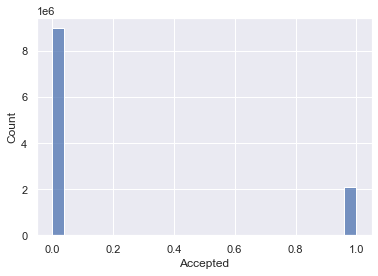

In [61]:
sns.histplot(data=combo, x='Accepted');

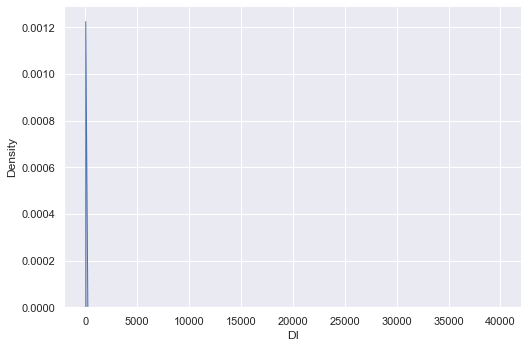

In [63]:
sns.displot(data=a, x='DI', kind='kde', fill=True, 
            palette=sns.color_palette('bright')[:1], height=5, aspect=1.5)


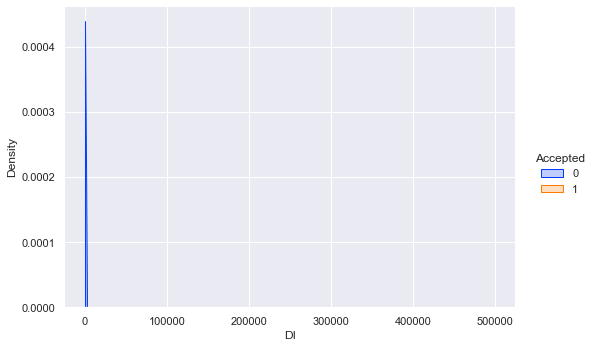

In [62]:
sns.displot(data=combo, x='DI', hue='Accepted', kind='kde', fill=True, 
            palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)
